# GOES time series plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from read import get_goes

Generate summary time series plots showing the daily minimum and
daily maximum flux for each instrument (flux-1 and flux-2) in
each year.  Mark the thresholds for C, M, and X flares with
horizontal lines.

In [2]:
years = [2017, 2019]

da = {}
for year in years:
    df = get_goes(year)
    df["DayofYear"] = [x.dayofyear for x in df.Time]
    da[year] = df

In [3]:
da[2017].head()

,Flux1,Flux2,Time,DayofYear
1,1.517700e-07,1.000000e-09,2017-01-01 00:00:01.931999922,1
2,1.517700e-07,1.296400e-09,2017-01-01 00:00:03.978999853,1
3,1.483700e-07,5.117400e-09,2017-01-01 00:00:06.028999805,1
4,1.500700e-07,1.296400e-09,2017-01-01 00:00:08.074999809,1
5,1.534600e-07,2.934000e-09,2017-01-01 00:00:10.125000000,1


In [4]:
def tsplot(year, vn, dolog):

    df = da[year]
    df["Flux"] = np.log10(df[vn]) if dolog else df[vn]
    dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})

    plt.figure(figsize=(12, 5))
    plt.axes([0.1, 0.1, 0.77, 0.8])
    plt.grid(True)
    plt.plot(dx.index, dx[("Flux", "amin")], "-", color="blue", label="Daily min", alpha=0.5)
    plt.plot(dx.index, dx[("Flux", "amax")], "-", color="red", label="Daily max", alpha=0.5)
    if dolog:
        plt.axhline(-6, label="C", color="green")
        plt.axhline(-5, label="M", color="orange")
        plt.axhline(-4, label="X", color="purple")
    else:
        plt.axhline(10**-6, label="C", color="green")
        plt.axhline(10**-5, label="M", color="orange")
        plt.axhline(10**-4, label="X", color="purple")
    ha, lb = plt.gca().get_legend_handles_labels()
    leg = plt.figlegend(ha, lb, loc="center right")
    leg.draw_frame(False)
    plt.xlabel("Day of year", size=15)
    plt.ylabel(vn, size=15)
    plt.title(year)

/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amin at 0x110e528e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})
/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amax at 0x110e52700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})


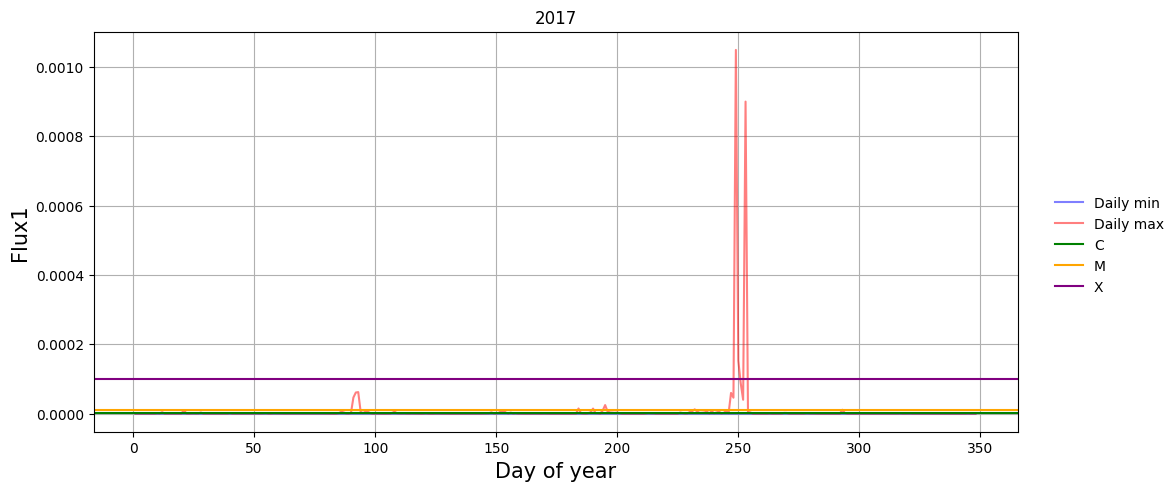

In [5]:
tsplot(2017, "Flux1", False)

/Users/liangqi/anaconda3/envs/PyTc/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amin at 0x110e528e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})
/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amax at 0x110e52700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})


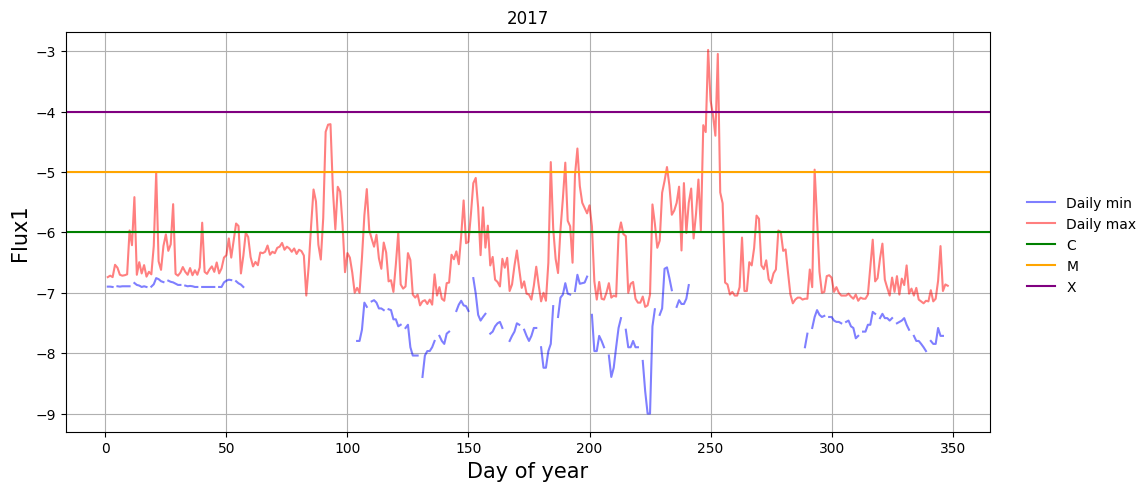

In [6]:
tsplot(2017, "Flux1", True)

/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amin at 0x110e528e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})
/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amax at 0x110e52700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})


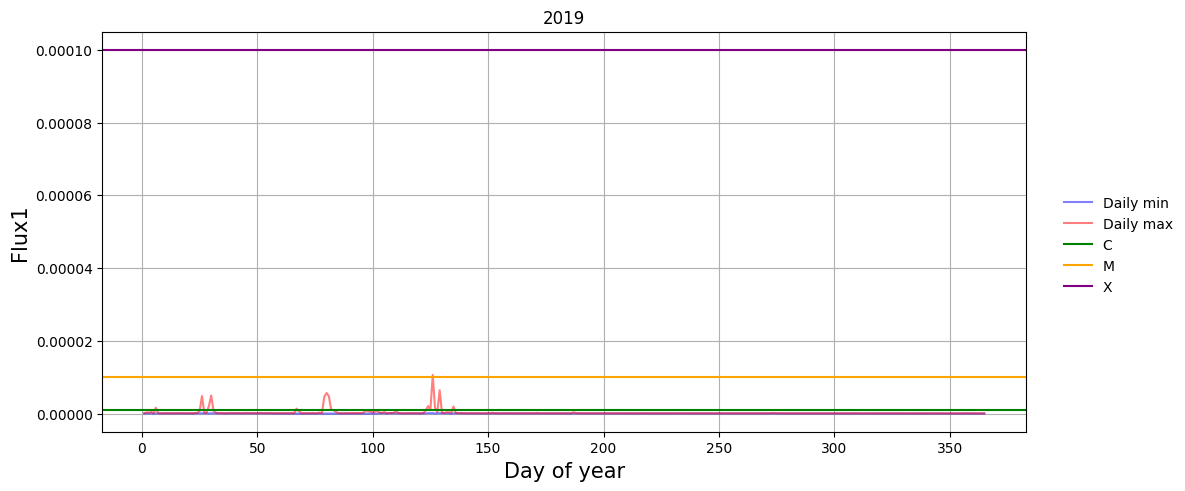

In [7]:
tsplot(2019, "Flux1", False)

/Users/liangqi/anaconda3/envs/PyTc/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amin at 0x110e528e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})
/var/folders/1m/g_2xpnh912g613fymwqbt4gr0000gn/T/ipykernel_87223/3920724961.py:5: FutureWarning: The provided callable <function amax at 0x110e52700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dx = df.groupby("DayofYear").agg({"Flux": [np.min, np.max]})


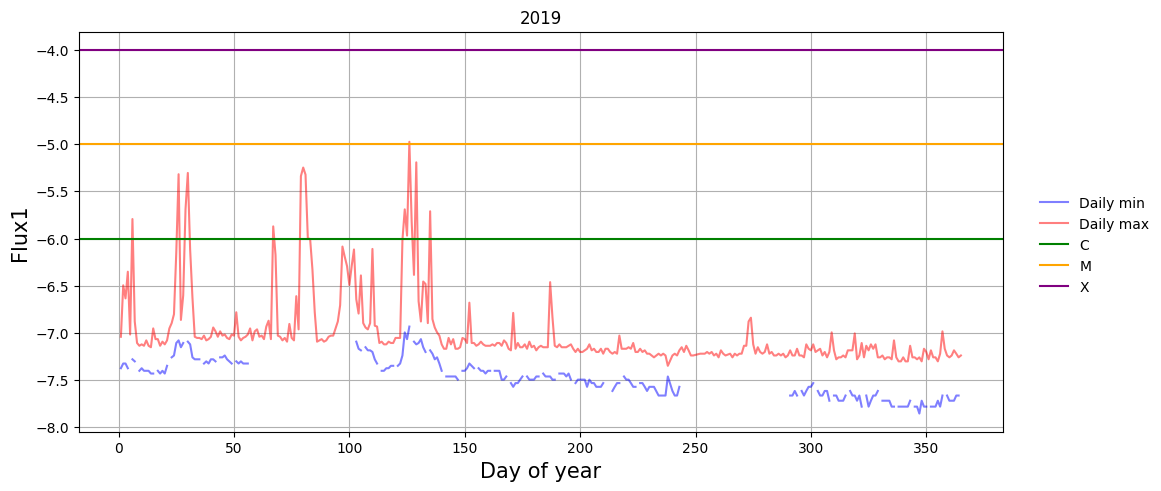

In [8]:
tsplot(2019, "Flux1", True)